In [1]:
from mitigate_disparity import mitigate_disparity

est = mitigate_disparity(
    dataset='data/mimic/development_dataset.train.csv',
    protected_features=[
        'ethnicity',
        'gender',
        'insurance'
    ]
)

categorical features: ['insurance', 'ethnicity']
numeric features: ['temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'pain', 'acuity', 'prev_adm']
dataset: data/mimic/development_dataset.train.csv
protected_features: ['ethnicity', 'gender', 'insurance']
running 24 processes
groups ['ethnicity', 'gender', 'insurance']
number of variables: 121
number of objectives: 2
checkpoint file: checkpoint.83b3fb1e-6120-43a8-b11c-fd297424a0ea.pkl
FPR: 0.06572904707233065
FPR: 0.05898392652123995
FPR: 0.06056257175660161
FPR: 0.06659012629161883
FPR: 0.0677382319173364
max SF loss FNR 0.10384798034199938
max SF loss FNR 0.09469037335906622
FPR: 0.07548794489092997
FPR: 0.06673363949483352
FPR: 0.06558553386911596
max SF loss FNR 0.08766139780311283
FPR: 0.062284730195177954
max SF loss FNR 0.09583665308662959
FPR: 0.060993111366245696
max SF loss FNR 0.10627653290539746
FPR: 0.06558553386911596
FPR: 0.06214121699196326
max SF lossmax SF loss  FNRFNR 0.08499179902366094 
0.07358718736190

FPR: 0.06013203214695752
max SF loss FPR:FNR  0.058840413318025260.07275643728933387

max SF loss FNR 0.07447683381321352
FPR: 0.058409873708381174
max SF loss FNR 0.07135478459785706
FPR: 0.064150401836969
FPR: 0.06472445464982779
max SF loss FNR 0.07809836425518436
max SF loss FNR 0.07394824011239863
FPR: 0.062284730195177954
FPR: 0.06271526980482205
max SF loss FNR 0.08284979319509539
FPR: 0.06185419058553387
max SF loss FNR 0.08002763551478859
FPR: 0.06113662456946039
max SF loss FNR 0.08561314253190577
max SF loss FNR 0.08301731480142999
FPR: 0.058266360505166474
max SF loss FNR 0.07147342513572852
FPR: 0.06472445464982779
FPR: 0.06529850746268656
max SF loss FNR 0.07394824011239863
max SF loss FNR 0.07407381554846539
FPR: 0.06142365097588978
max SF loss FNR 0.07765202143436231
FPR: 0.058266360505166474
FPR: 0.06544202066590127
max SF loss FNR 0.07556622547685347
FPR:max SF loss  0.05884041331802526FNR
 0.07394444540566762
max SF loss FNR 0.07121547318315688
FPR: 0.065298507462686

# visualize final front

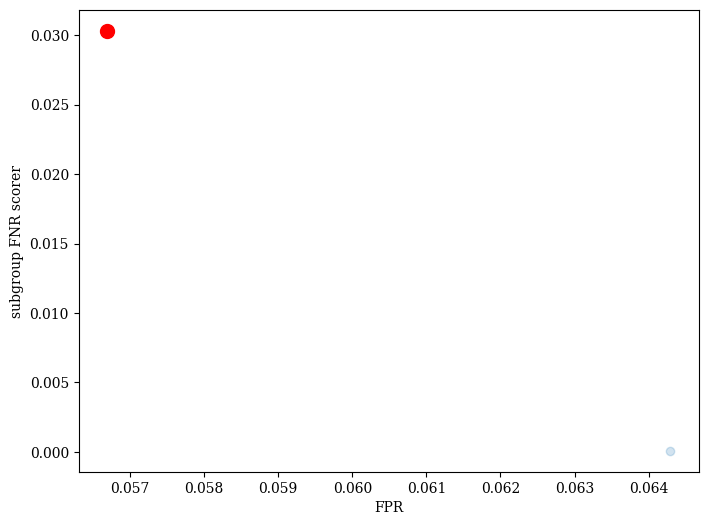

In [2]:
import pickle
with open('estimator.pkl','rb') as f:
    est = pickle.load(f)
est.plot().show()

# save video of optimization

In [3]:
from pyrecorder.recorder import Recorder
from pyrecorder.writers.video import Video
# from pyrecorder.writers.streamer import Streamer
from pymoo.visualization.scatter import Scatter
import matplotlib.pyplot as plt
with open('estimator.pkl','rb') as f:
    est = pickle.load(f)
# use the video writer as a resource
filename = "lr_nsga3_mlp.mp4"
with Recorder(Video(filename, fps=2)) as rec:
    # for each algorithm object in the history
    for entry in est.res_.history:
        sc = Scatter(title=("Gen %s" % entry.n_gen),
                     labels=['Overall False Positive Rate (FPR)', 'Subgroup False Negative Rate (FNR) Violation']
                    )
        sc.add(entry.pop.get("F"))
#         sc.add(entry.pop.get("F"), plot_type="line", color="black", alpha=0.7)
        sc.do()
#         plt.xlim([0.02, 0.1])
#         plt.ylim([0.29, 0.39])
        # finally record the current visualization to the video
        rec.record()
    

# check test set performance

In [4]:
from utils import make_measure_dataset
import pandas as pd

import pickle
with open('estimator.pkl','rb') as f:
    est = pickle.load(f)
    
df_test = pd.read_csv('data/mimic/development_dataset.test.csv')
X_test = df_test.drop(columns='binary outcome')
y_test = df_test['binary outcome']
make_measure_dataset(est, 'fomo', X_test, y_test)

insurance
['Medicaid', 'Medicare', 'Other']
[2 0 1]
ethnicity
['AMERICAN INDIAN/ALASKA NATIVE', 'ASIAN', 'BLACK/AFRICAN AMERICAN', 'HISPANIC/LATINO', 'WHITE']
[4 3 2 0 1]
gender
['F', 'M']
[1 0]


In [5]:
from measure_disparity import measure_disparity
df_fairness = measure_disparity('fomo_model_mimic4_admission.csv')

reading in fomo_model_mimic4_admission.csv
demographic columns: ['insurance', 'ethnicity', 'gender']
Overall Performance
	Measures of predictive bias on the whole population.
╭─────────┬─────────┬───────────────────┬───────┬───────┬────────────╮
│   AUROC │   AUPRC │   Positivity Rate │   FPR │   FNR │   Accuracy │
├─────────┼─────────┼───────────────────┼───────┼───────┼────────────┤
│   0.864 │   0.746 │             0.326 │ 0.068 │ 0.477 │      0.811 │
╰─────────┴─────────┴───────────────────┴───────┴───────┴────────────╯
Subgroup Fairness Violations
	Measures the deviation in performance for marginal and intersectional groups.
	Note that these deviation are weighted by group prevalence to produce stable estimates when sample sizes are small.
╭─────────────┬───────────────────────────────┬──────────┬─────────────────────┬─────────┬─────────┬───────────────────╮
│   insurance │                     ethnicity │   gender │   Brier Score (MSE) │     FNR │     FPR │   Positivity Rate │
├──